In [11]:
import base64
import os
import random
import boto3
import json
from dotenv import load_dotenv
import io
from PIL import Image
from IPython.display import display, Image as IPyImage

# hide my access  information
load_dotenv(r"credentials.env")

# save all env-variables into notebook-variables
AWS_ACCESS_KEY_ID = os.environ.get("AWS_ACCESS_KEY_ID")
AWS_SECRET_ACCESS_KEY = os.environ.get("AWS_SECRET_ACCESS_KEY")
AWS_REGION  = os.environ.get("AWS_REGION")

What would you like to generate? a baby alien in space, van Gogh style


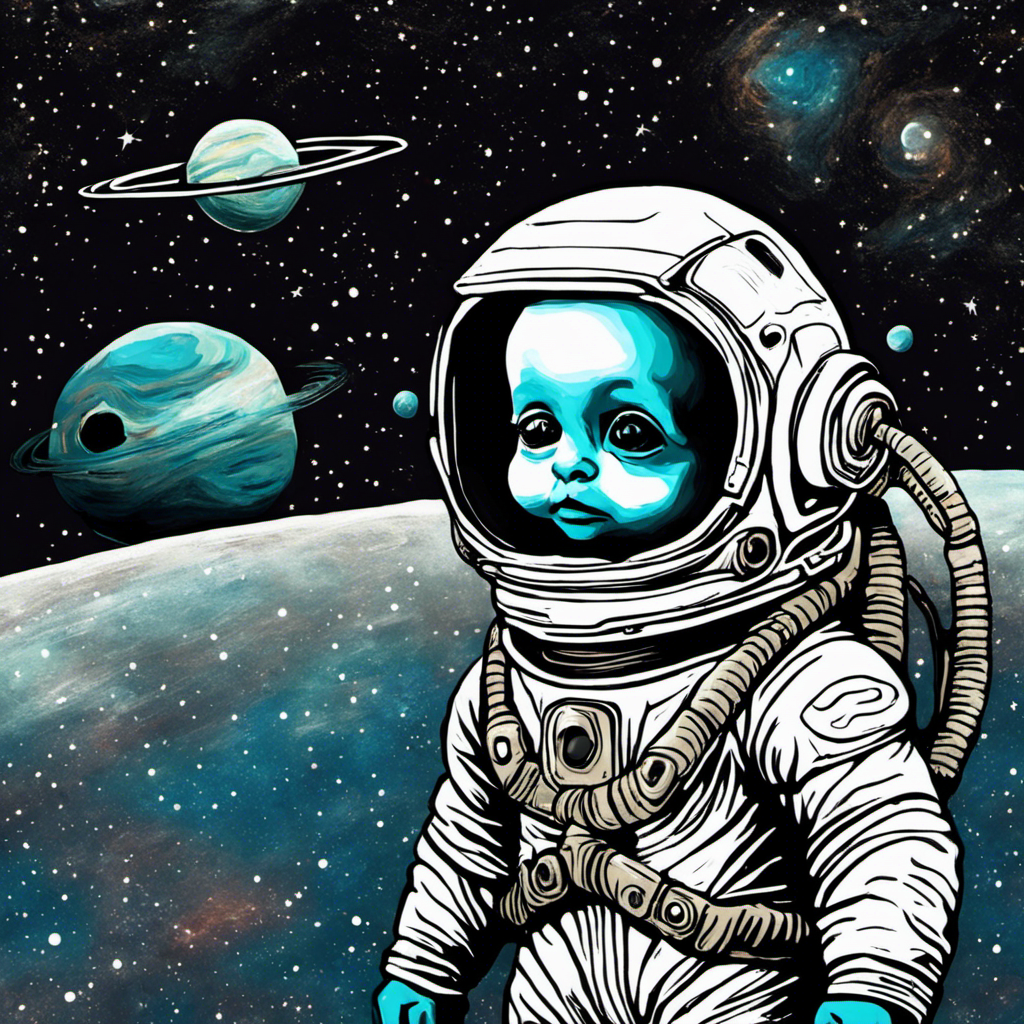

In [12]:
# Capture a prompt and store it inside the user_prompt variable
user_prompt= input("What would you like to generate?")


# Configure the API-request body  following the parameter documentation (https://platform.stability.ai/docs/features/api-parameters)
seed= random.randint(0,100000)
payload = {
    "text_prompts": [{"text":user_prompt}],
    "cfg_scale": 12,
    "seed":seed,
    "steps": 100,
}

# Create a AWS-client and invoke then model
bedrock=  boto3.client(service_name="bedrock-runtime", 
                       region_name=AWS_REGION,aws_access_key_id=AWS_ACCESS_KEY_ID,
                       aws_secret_access_key=AWS_SECRET_ACCESS_KEY)
body=json.dumps(payload)
model_id="stability.stable-diffusion-xl-v1"
response= bedrock.invoke_model(
    body=body,
    modelId= model_id,
    accept="application/json",
    contentType="application/json",
)

# Get the image from the response which is base64 encoded
response_body= json.loads(response.get("body").read())
artifact= response_body.get("artifacts")[0]
image_encoded= artifact.get("base64").encode("utf-8")
image_bytes= base64.b64decode(image_encoded)

# Show the image in Windows-Photo Viewer using the Pillow (PIL) library
image = Image.open(io.BytesIO(image_bytes))
image.show()

# Show the picture inside this Notebook using the IPython library
display(IPyImage(data=image_bytes, format="png"))